In [ ]:
import pandas as pd
data = pd.read_csv("/content/AQI DATASET - UPDATED (1).csv")
data.head()

,State/UT,Year,Population_totals,Population_male,Population_female,AQI,Disease,Total_cases,Male_deaths,Female_deaths,SO2,NO2,PM10,PM2.5,Total_deaths,AQI_levels
0,1,2017,89034,44671,44363,119.25,4,3103021,208,130,7.000,21.00,74.0,22.00,338,3
1,1,2018,89691,44986,44705,61.00,4,3149897,380,207,6.000,20.00,71.0,40.00,587,2
2,1,2019,90330,45293,45037,88.75,4,2986495,295,181,8.000,18.00,64.0,28.00,476,2
3,1,2020,90950,45591,45359,68.75,4,1790718,2062,743,6.000,16.00,56.0,28.00,2805,2
4,1,2021,91549,45880,45669,102.50,4,1897511,2833,1661,7.125,17.56,63.0,28.25,4494,3


<Axes: >

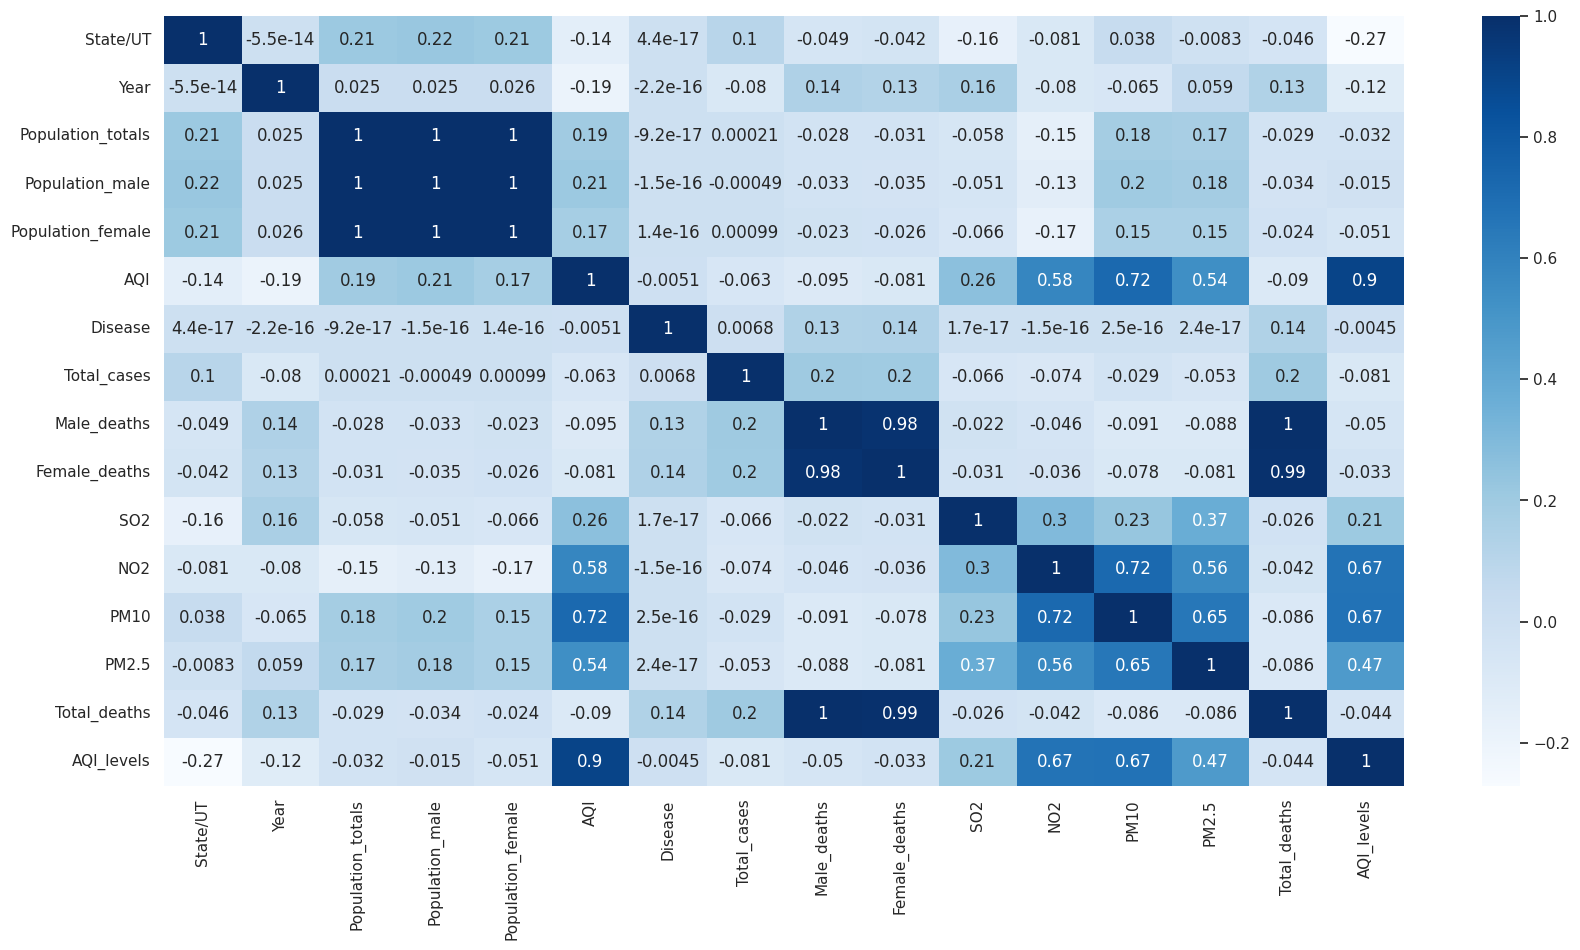

In [ ]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), cmap="Blues", annot=True)

In [ ]:
data = data.drop(columns=['Population_totals', 'Population_male', 'Population_female', 'AQI_levels'])

<Axes: >

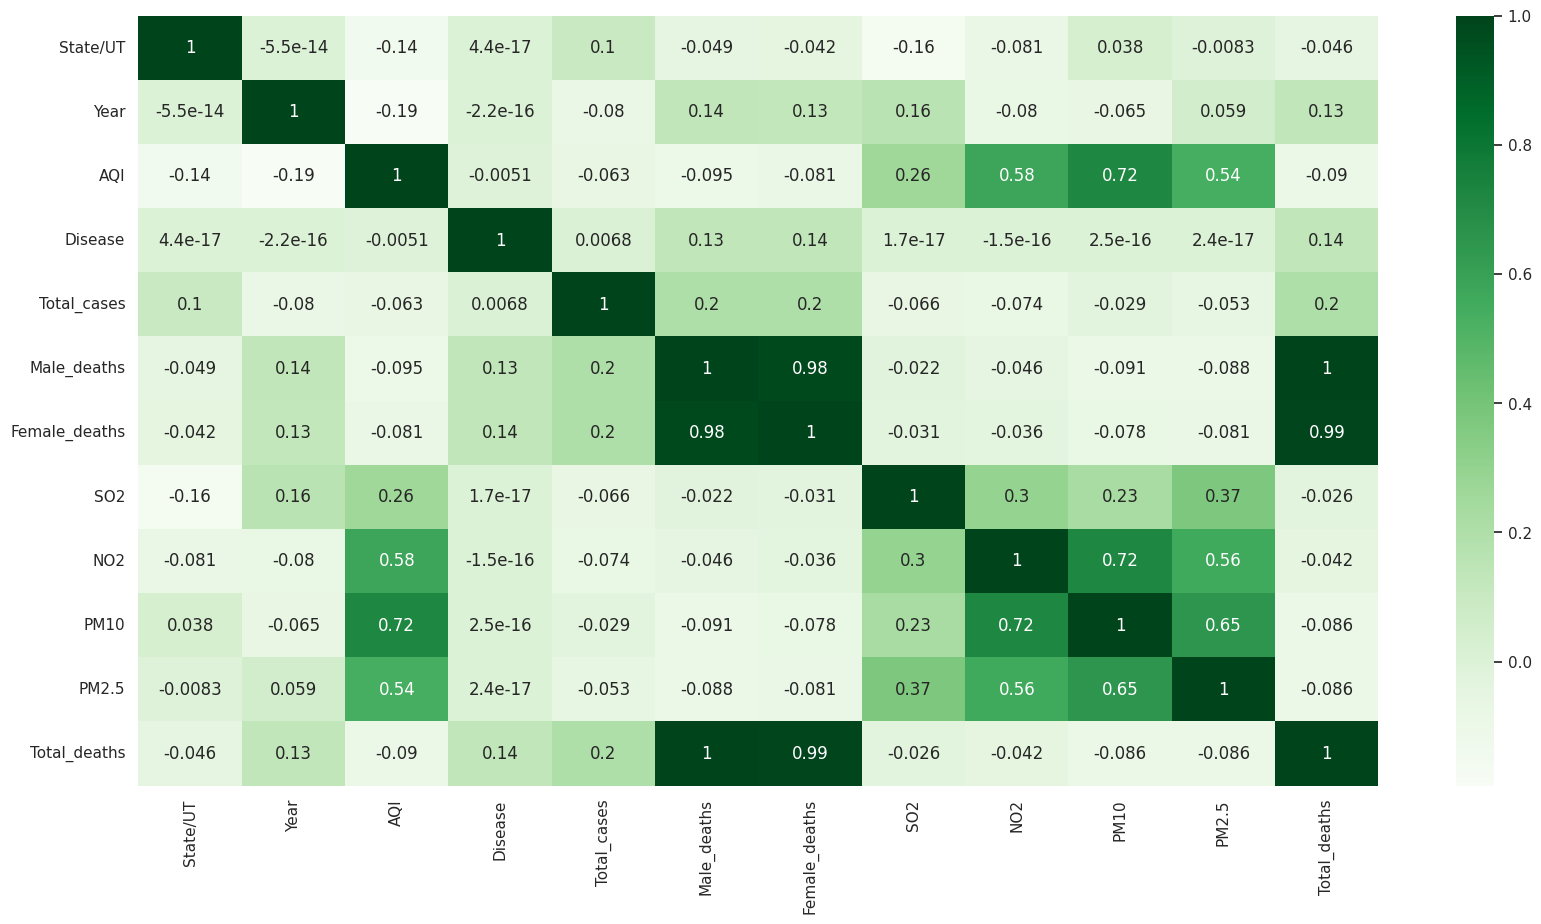

In [ ]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), cmap="Greens", annot=True)

In [ ]:
features = ['State/UT', 'Year',  'AQI', 'Disease', 'Total_cases', 'Male_deaths', 'Female_deaths', 'SO2', 'NO2', 'PM10', 'PM2.5']
label = 'Total_deaths'
X, y = data[features].values, data[label].values
for n in range(0,5):
  print(str(n+1), "\n Features:",list(X[n]), "\n Label:", y[n])

1 
 Features: [1.0, 2017.0, 119.25, 4.0, 3103021.0, 208.0, 130.0, 7.0, 21.0, 74.0, 22.0] 
 Label: 338
2 
 Features: [1.0, 2018.0, 61.0, 4.0, 3149897.0, 380.0, 207.0, 6.0, 20.0, 71.0, 40.0] 
 Label: 587
3 
 Features: [1.0, 2019.0, 88.75, 4.0, 2986495.0, 295.0, 181.0, 8.0, 18.0, 64.0, 28.0] 
 Label: 476
4 
 Features: [1.0, 2020.0, 68.75, 4.0, 1790718.0, 2062.0, 743.0, 6.0, 16.0, 56.0, 28.0] 
 Label: 2805
5 
 Features: [1.0, 2021.0, 102.5, 4.0, 1897511.0, 2833.0, 1661.0, 7.125, 17.56, 63.0, 28.25] 
 Label: 4494


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
for col in features:
  data.boxplot(column=col, by='Total_deaths', figsize=(9,6))
  plt.title(col)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 262
Test cases: 88


In [ ]:
from sklearn.linear_model import LinearRegression
reg = 0.01
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
print(X_test)

[[2.000000e+00 2.018000e+03 1.490000e+02 4.000000e+00 1.073262e+06
  0.000000e+00 2.000000e+00 1.100000e+01 2.900000e+01 1.320000e+02
  7.100000e+01]
 [1.000000e+00 2.019000e+03 8.875000e+01 5.000000e+00 1.110000e+02
  1.000000e+00 0.000000e+00 8.000000e+00 1.800000e+01 6.400000e+01
  2.800000e+01]
 [5.000000e+00 2.017000e+03 8.475000e+01 7.000000e+00 2.760000e+02
  0.000000e+00 1.000000e+00 3.000000e+00 2.100000e+01 7.900000e+01
  3.700000e+01]
 [1.000000e+01 2.017000e+03 9.250000e+01 4.000000e+00 3.941640e+06
  2.330000e+02 2.180000e+02 5.350000e+00 1.000000e+01 8.434000e+01
  8.233000e+01]
 [1.000000e+01 2.018000e+03 1.027500e+02 7.000000e+00 9.670000e+02
  4.400000e+01 3.600000e+01 7.000000e+00 3.700000e+01 1.170000e+02
  6.600000e+01]
 [8.000000e+00 2.021000e+03 6.250000e+01 3.000000e+00 2.300000e+01
  0.000000e+00 0.000000e+00 9.580000e+00 1.652000e+01 4.964000e+01
  2.258000e+01]
 [9.000000e+00 2.018000e+03 1.862500e+02 3.000000e+00 1.349000e+03
  0.000000e+00 0.000000e+00 1.100

In [ ]:
predictions = model.predict(X_test)
print('Predicted labels: ',predictions)
print('Actual labels: ',y_test)

Predicted labels:  [ 2.00000000e+00  1.00000000e+00  1.00000000e+00  4.51000000e+02
  8.00000000e+01 -1.47261878e-12 -1.32928629e-12 -1.31002783e-12
 -1.32457304e-12  6.70000000e+01 -1.32558908e-12 -1.39998295e-12
  3.00000000e+00 -1.36498388e-12 -1.35851646e-12 -1.39601833e-12
 -1.38415253e-12 -1.42466662e-12  2.00000000e+00  7.57000000e+02
  6.23000000e+02 -1.45525032e-12  6.10000000e+01 -1.40655974e-12
 -1.34469214e-12  1.00000000e+01  7.70752788e-12 -1.47227263e-12
 -1.39305838e-12  2.00000000e+00 -1.37264855e-12  1.13000000e+02
 -1.42570133e-12 -1.37295120e-12  4.00000000e+00 -1.34518315e-12
  5.66000000e+02  8.00000000e+00 -1.41914918e-12  7.30000000e+01
  6.00000000e+00 -1.45600713e-12  2.00000000e+00 -1.41021193e-12
  1.20000000e+01 -1.38344264e-12 -1.35906763e-12  6.60200000e+03
 -1.35873677e-12 -1.36904681e-12 -1.42191654e-12 -1.45893529e-12
 -1.45027524e-12  1.40000000e+01 -1.34551674e-12  2.50000000e+01
  1.00000000e+00 -1.33947890e-12 -1.45097368e-12 -1.38866515e-12
  1.20

In [ ]:
from sklearn.metrics import mean_squared_error
print('Loss: ', mean_squared_error(predictions, y_test))

Loss:  1.101239776793897e-23


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

1.0


In [ ]:
#decisiontree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model, "\n")
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_5 <= 1560.00
|   |--- feature_6 <= 160.50
|   |   |--- feature_5 <= 118.50
|   |   |   |--- feature_5 <= 32.00
|   |   |   |   |--- feature_5 <= 11.50
|   |   |   |   |   |--- feature_5 <= 6.00
|   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 2.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2017.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2017.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 

MSE:  61148.97727272727
RMSE:  247.28319245902514
R2:  0.9077041276046034


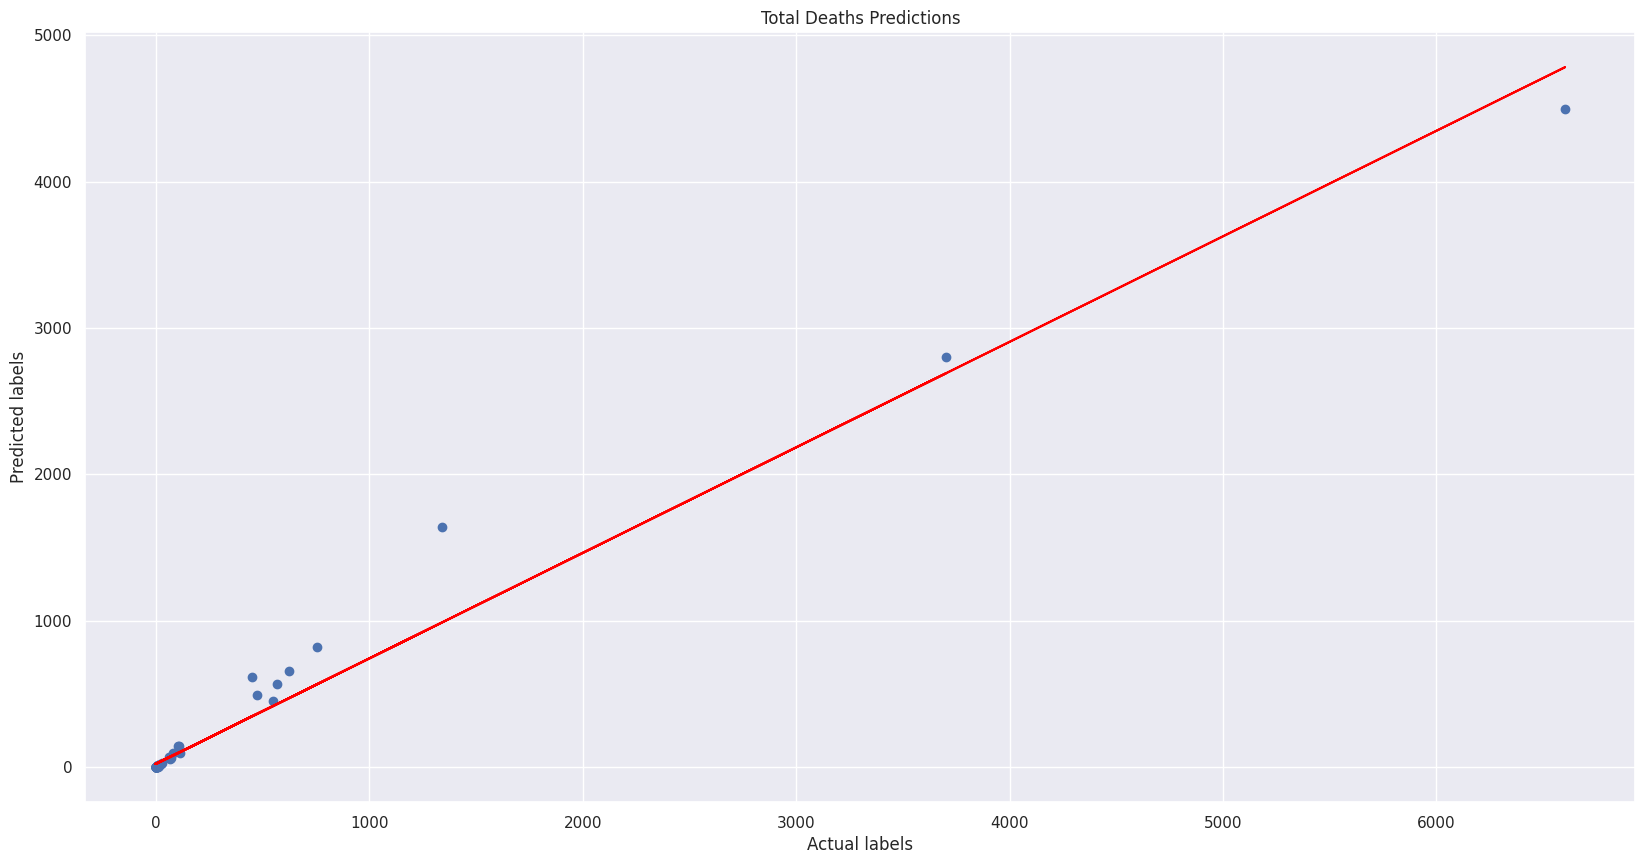

In [ ]:
import numpy as np
import math
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2: ", r2)
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title("Total Deaths Predictions")
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [ ]:
y = model.predict(X_test[87,:].reshape(1,-1))
y[0]

30.0

In [ ]:
y_test[87]

27

In [ ]:
import pandas as pd
import pickle
df = pd.read_csv('/content/AQI DATASET - UPDATED (1).csv')
with open('/content/AQI DATASET - UPDATED (1).pkl', 'wb') as f:
  pickle.dump(df, f)
with open('/content/AQI DATASET - UPDATED (1).pkl', 'rb') as f:
  df = pickle.load(f)
print(f)

<_io.BufferedReader name='/content/AQI DATASET - UPDATED (1).pkl'>


In [ ]:
import joblib
fn = '/content/AQI DATASET - UPDATED (1).pkl'
joblib.dump(model, fn)

['/content/AQI DATASET - UPDATED (1).pkl']

In [ ]:
import numpy as np
model = joblib.load(fn)
X_new = np.array([[7,2021,54.75,1,0,3112,1245,3,8.38,51,8.38]])
print('New sample: {}'.format(list(X_new[0])))
pred = model.predict(X_new)
print('Predcited value is {}'.format(pred[0]))

New sample: [7.0, 2021.0, 54.75, 1.0, 0.0, 3112.0, 1245.0, 3.0, 8.38, 51.0, 8.38]
Predcited value is 2805.0
